# Exploratory Data Analysis

This notebook allows to better understand the data obtained using ``` 1_dataset_generation.ipynb```.<br>
It is usefull to make educated guess for the ``` 3_training_model.ipynb```

In [1]:
import pandas as pd
from pathlib import Path

from eda import *

### List of valid datasets (complete runs)

In [2]:
from pathlib import Path
BASE_DIR = Path("datasets")

tags = list_datasets_with_rep(BASE_DIR) # Have a rep.csv file
print("Datasets with rep.csv:", tags)

Datasets with rep.csv: ['rect_6x2', 'ring_12', 'ring_6', 'ring_9']


### Example of usage

In [3]:
tag = tags[0]
rep = pd.read_csv(BASE_DIR / tag / "rep.csv")

ds_dir = BASE_DIR / tag

df = merge_step1_and_rep(step1_csv=ds_dir / "S.csv", rep_csv=ds_dir / "rep.csv")
print(df.shape[0])
df.head()

54453


,observable,tau,f1,f2,f3,f4,f5,f6,f7,f8,...,f70,f71,f72,f73,f74,f75,f76,f77,f78,f79
0,16030720,1,-0.000103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15653966,1,0.000585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2191328,1,-0.021606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10346156,1,-0.008930,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,13303700,1,0.006518,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print_tau_counts(df)
print_zero_overlap(df)
print_second_smallest_abs_overlap(df)

Number of entries with tau = 0: 0
Number of entries with tau = 1: 54453
Number of entries with f1 = 0: 3014
Second smallest |f1| (excluding 0): 4.1738055584159284e-08


In [5]:
df_S = pd.read_csv(ds_dir / "S.csv")
print_tau_counts(df_S)

Number of entries with tau = 0: 0
Number of entries with tau = 1: 1793431


Observation. Although it may appear surprising that all Pauli strings have $\tau=1$, this simply indicates that each string was truncated at least once during the propagation.<br>
It does not imply that the string is absent from the final Pauli sum.<br>
Introducing an additional indicator for whether a Pauli string survives to the final layer would provide a clearer picture of the dynamics.

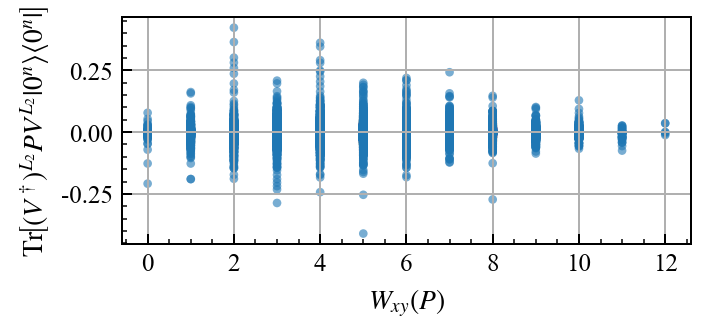

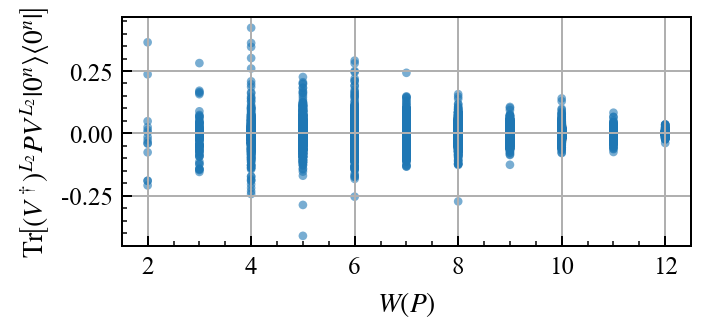

In [6]:
plot_overlap_vs_weight(df, weight="xy_weight", overlap_col="f1")
plot_overlap_vs_weight(df, weight="pauli_weight", overlap_col="f1")

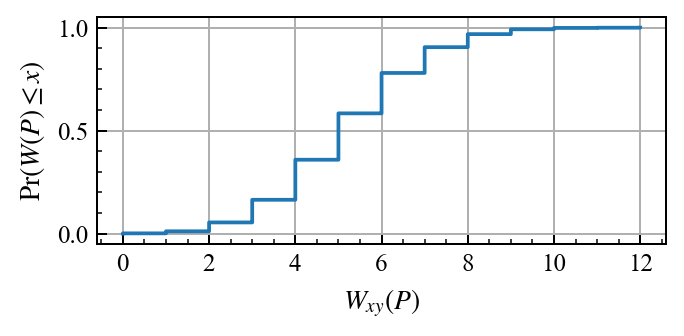

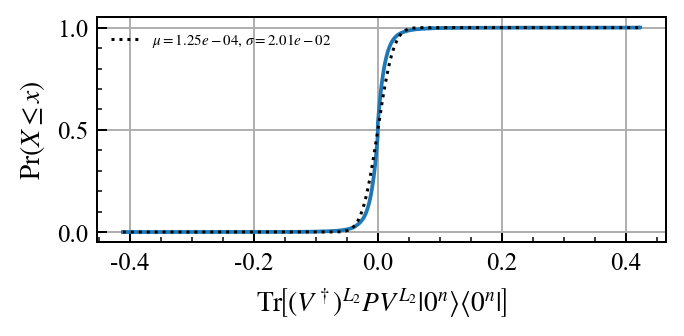

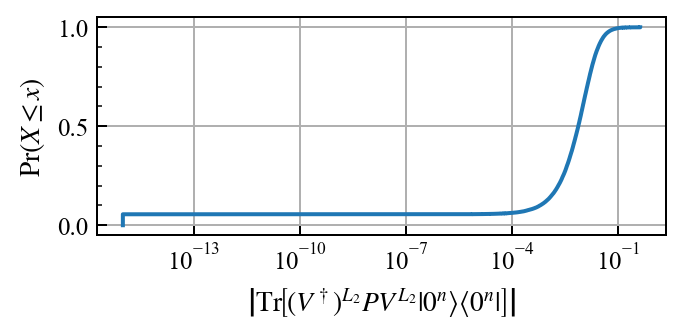

In [7]:
plot_cdf_weight(df, weight="xy_weight")
plot_cdf_overlap(df)
plot_cdf_abs_overlap(df, epsilon=1e-15) # About the order of the precision of Float64 in Julia

# Ring topologies

Dataset ring_6
324
Number of entries with tau = 0: 129
Number of entries with tau = 1: 195
Number of entries with f1 = 0: 25
Second smallest |f1| (excluding 0): 0.0015471364483177
Number of entries with tau = 0: 1103
Number of entries with tau = 1: 1967


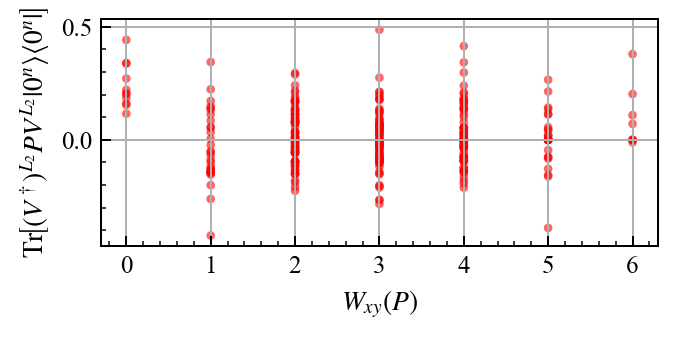

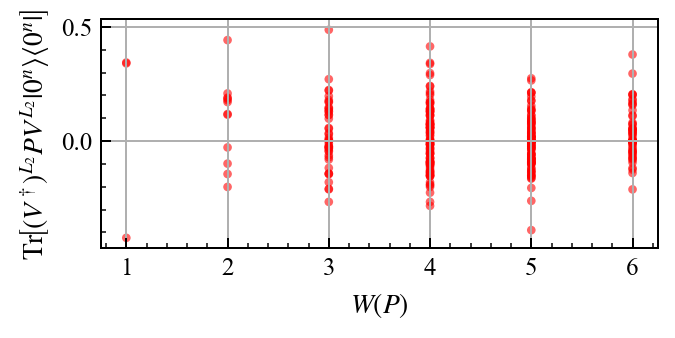

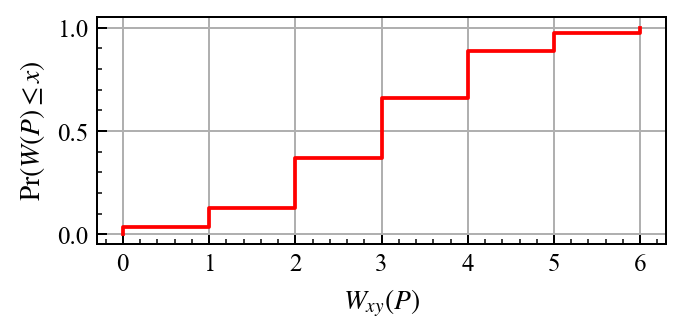

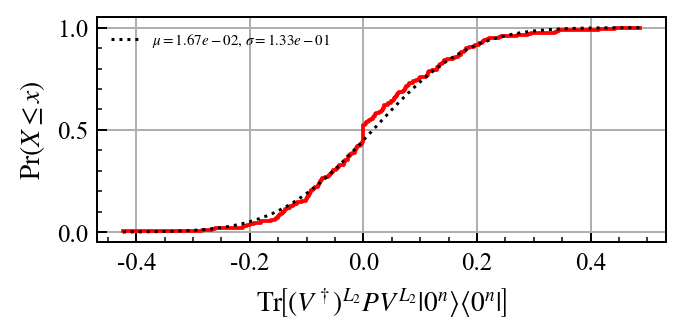

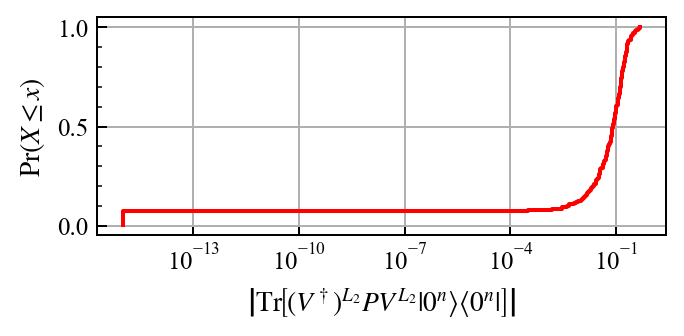

Dataset ring_9
13918
Number of entries with tau = 0: 40
Number of entries with tau = 1: 13878
Number of entries with f1 = 0: 1476
Second smallest |f1| (excluding 0): 6.745456728809128e-06
Number of entries with tau = 0: 450
Number of entries with tau = 1: 237753


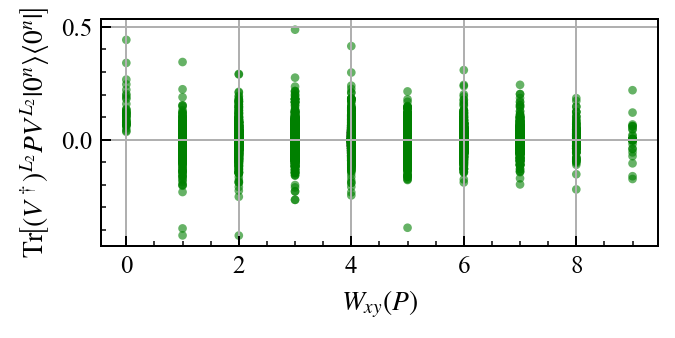

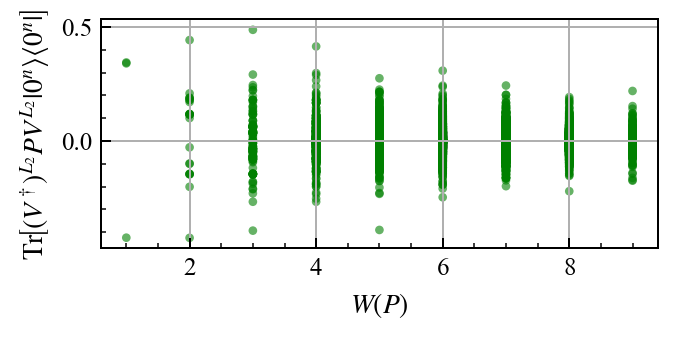

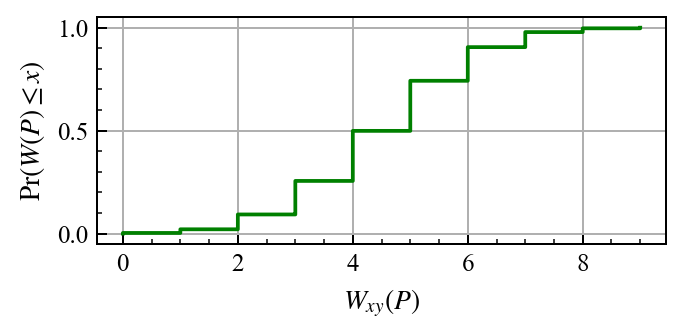

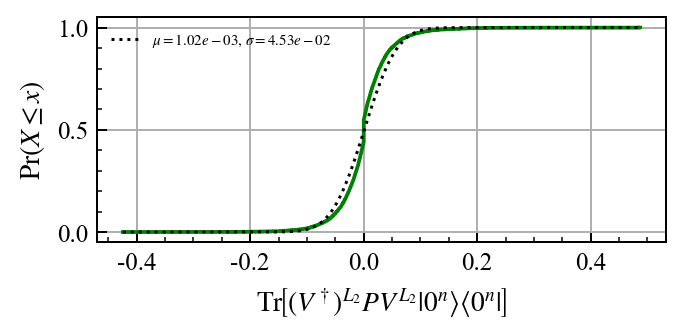

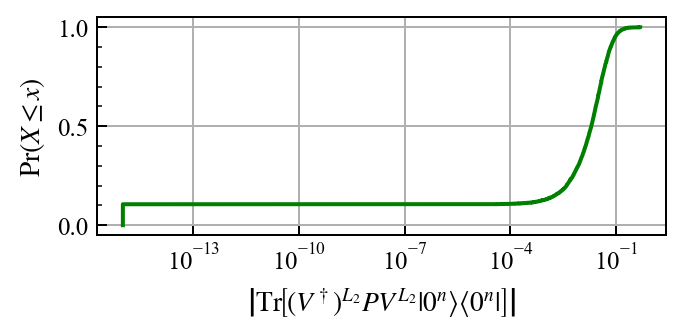

Dataset ring_12
10026
Number of entries with tau = 0: 8
Number of entries with tau = 1: 10018
Number of entries with f1 = 0: 2291
Second smallest |f1| (excluding 0): 1.623070384920895e-06
Number of entries with tau = 0: 306
Number of entries with tau = 1: 784313


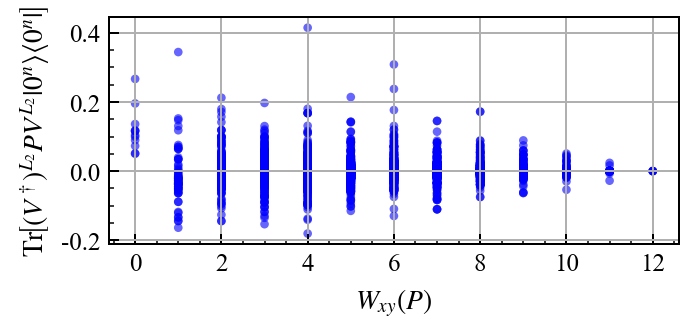

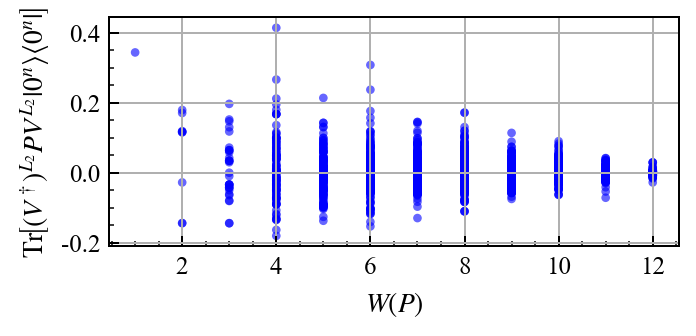

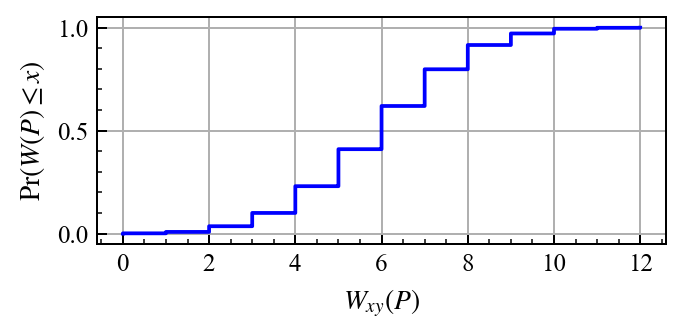

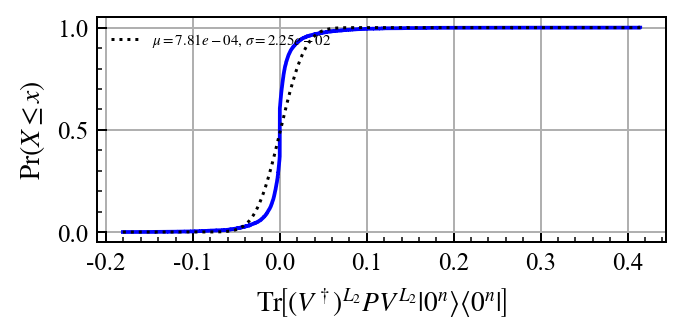

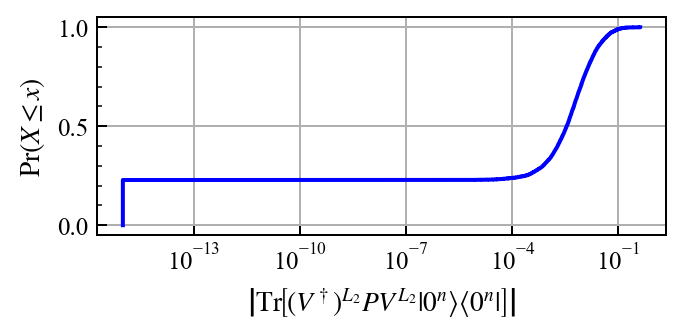

In [8]:
colors = ["r","g","b"]
for i,tag in enumerate(['ring_6', 'ring_9', 'ring_12']):
    print(f"Dataset {tag}")
    rep = pd.read_csv(BASE_DIR / tag / "rep.csv")
    ds_dir = BASE_DIR / tag
    df = merge_step1_and_rep(step1_csv=ds_dir / "S.csv", rep_csv=ds_dir / "rep.csv")
    print(df.shape[0])
    df.head()
    print_tau_counts(df)
    print_zero_overlap(df)
    print_second_smallest_abs_overlap(df)
    df_S = pd.read_csv(ds_dir / "S.csv")
    print_tau_counts(df_S)
    plot_overlap_vs_weight(df, weight="xy_weight", overlap_col="f1", color=colors[i])
    plot_overlap_vs_weight(df, weight="pauli_weight", overlap_col="f1", color=colors[i])
    plot_cdf_weight(df, weight="xy_weight", color=colors[i])
    plot_cdf_overlap(df, color=colors[i])
    plot_cdf_abs_overlap(df, epsilon=1e-15, color=colors[i])
